In [1]:
pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git

  Cloning https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to /tmp/pip-req-build-ez_5d_hn
  Running command git clone --filter=blob:none --quiet https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git /tmp/pip-req-build-ez_5d_hn
  Resolved https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git to commit 8b4cb652cdbe7ea20784efd596eaf9a144f6e1aa
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 16

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

En este desafío entrenaremos un discrimonador cuántico para el conocido __"Iris Flowers"__ dataset. Este fue introducido por el estadístico y biólogo __Ronald A. Fisher__ en 1936 en su trabajo "The use of multiple measurements in taxonomic problems", sobre análisis discriminante lineal. Este conjunto contiene información sobre tres especies de flores de Iris: iris setosa, iris versicolor y viris virginica. El conjunto contiene 150 muestras, 50 por cada especie, con las siguientes características:

1. Largo del sépalo.
2. Ancho del sépalo.
3. Largo del pétalo.
4. Ancho del pétalo.

Para aquellos que no sepan, el sépalo es la estructura externa de la flor, tipicamente verde, que forma un cáliz en la base de la flor, mientras que los pétalos son las estructuras internas, usualmente coloridos, que forman la corola de la flor.

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/ECC_iris_flower.png?raw=true)

Las siguientes celdas cargan los datos y los separa en datos de entrenamiento ```(X_train, Y_train)``` y datos de test ```(X_test, Y_test)```.

In [3]:
# carge de otra forma el data
iris = load_iris()

data_iris = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data_iris['target'] = iris['target']
# si lo cargamos asi ya no es necesario tener el csv en el github dado que esta dentro del sklearn

In [4]:
# link = 'https://raw.githubusercontent.com/LucianoPereiraValenzuela/ECC_2025_testing/refs/heads/main/ECC2025/IRIS.csv'
# data = pd.read_csv( link,  low_memory=False )
# data.head(60)

In [5]:
# esto lo agrege
X_train, X_test, y_train, y_test = train_test_split(data_iris[iris.feature_names],
                                                    data_iris['target'],
                                                    test_size=0.3,                      #tamaño test
                                                    random_state=42)                    #como ordena los datos

In [6]:
# data    = data.sample( frac = 1, random_state=0 )
# X_train = data[ ["sepal_length","sepal_width",
#                     "petal_length","petal_width"]
#                     ].to_numpy()
# X_test  = X_train[:45,:]
# X_train = X_train[45:,:]
# Y_train = data["species"]
# Y_train = Y_train.replace('Iris-setosa', 0)
# Y_train = Y_train.replace('Iris-versicolor', 1)
# Y_train = Y_train.replace('Iris-virginica', 2).to_numpy()
# Y_test  = Y_train[:45]
# Y_train = Y_train[45:]

__Desafio:__ Construya un circuito parametrico de 4 qubits para cargar los datos al computador cuántico. Este circuito cuántico debe componerse solamente de puertas ``h``, ``rz``, y ``cx``, y tener 4 parámetros.

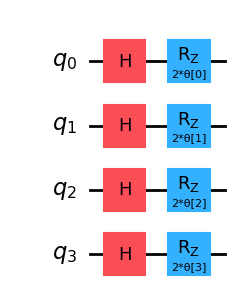

In [7]:
def optimized_quantum_circuit():

    qc_dato = QuantumCircuit(4)

    #### Escribe tu solución acá

    theta = ParameterVector('θ', 4)

    qc_dato.h([0, 1, 2, 3])
    qc_dato.rz(2 * theta[0], 0)
    qc_dato.rz(2 * theta[1], 1)
    qc_dato.rz(2 * theta[2], 2)
    qc_dato.rz(2 * theta[3], 3)

    #qc_dato.cx(0, 1)
    #qc_dato.cx(2, 3)
    #qc_dato.cx(1, 2)

    return qc_dato

qc_optimizado = optimized_quantum_circuit()

###

qc_optimizado.draw('mpl')

In [8]:
def test_7a(qc_dato):
    sol = True
    if qc_dato.num_qubits == 4 :
        pass
    else:
        print('Tu circuito no tiene parametros.')
        sol = False
    if qc_dato.num_parameters == 0 :
        print('Tu circuito no tiene parametros.')
        sol = False
    elif qc_dato.num_parameters > 4:
        print('Tu circuito tiene muchos parametros')
        sol = False

    for op in qc_dato.count_ops().keys():
        if op in [ 'h', 'rz', 'cx' ]:
            pass
        else:
            print('Estas usando una puerta no permitida.')

    if sol:
        print('Tu circuito es correcto')


In [9]:
test_7a(qc_optimizado)

Tu circuito es correcto


__Desafio:__ Para evaluar los elementos del kernel cuántico utilizaremos el __swap test__. Esta es una técnica que permite obtener la fidelidad entre dos estados cuántico $|\psi\rangle$ y $|\phi\rangle$. Esta se basa en preparar los dos estados en conjutos de qubits diferentes, y luego conectarlos mediantes puertas ``cswap`` a un qubit auxiliar, tal como muestra la figura. Medir $\sigma_z$ en el qubit auxiliar nos permite obtener la fidelidad entre ambos estados.

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/ECC2025_swap_test.png?raw=true)

Evalue la fidelidad entre dos datos para el estado que construyo en el desafío anterior con el swap test.

In [10]:
def kernel_element( dato_1, dato_2,
                    backend=Estimator(options={'seed':1}), shots=1000  ):

    value = 0 # resultado por defecto, ustede debe remplazalo
    qc_swap_test = QuantumCircuit( 9 )

    ## Escribe tu solución acá
    qc_dato1 = qc_optimizado.copy().assign_parameters( dato_1)
    qc_dato2 = qc_optimizado.copy().assign_parameters( dato_2)

    qc_swap_test.compose( qc_dato1, qubits=[1,2,3,4], inplace=True )
    qc_swap_test.compose( qc_dato2, qubits=[5,6,7,8], inplace=True )

    qc_swap_test.h(0)
    qc_swap_test.cswap(0,1,5)
    qc_swap_test.cswap(0,2,6)
    qc_swap_test.cswap(0,3,7)
    qc_swap_test.cswap(0,4,8)
    qc_swap_test.h(0)

    job= backend.run(qc_swap_test,SparsePauliOp(['IIIIIIIIZ'],[1]),shots=shots)
    value=job.result().values[0]
    ##

    return qc_swap_test, value

<ipython-input-10-ece56c8ce944>:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  backend=Estimator(options={'seed':1}), shots=1000  ):


1.0000000001994431


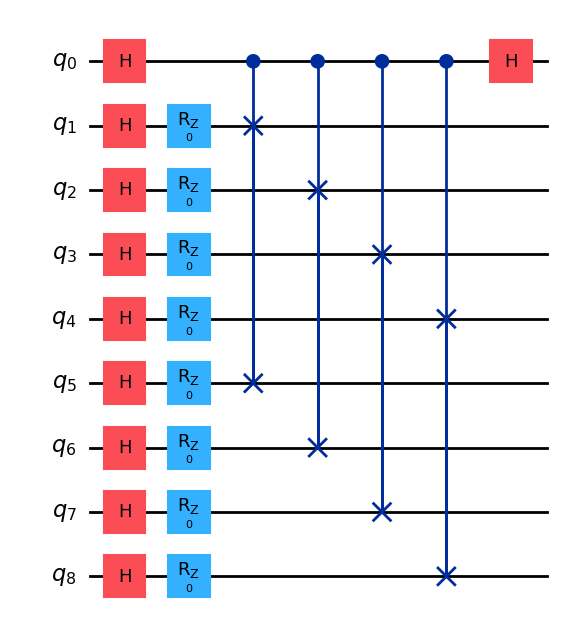

In [11]:
qc_swap_test, value = kernel_element( np.zeros(4), np.zeros(4) )
print( value )
qc_swap_test.draw('mpl')

In [12]:
## test pendiente...

La siguiente celdas calculan y muestran el kernel cuántico.

In [13]:
def Quantum_Kernel( X_train, X_test=None,
                    backend=Estimator(options={'seed':1}), shots=1000 ):
    """
    X_train : vector bidimensional para entrenar
    X_test  : vector bidimensional para testear
    K_q     : Kernel cuantico
    backend : simulador o computador cuantico
    shots   : numero de shots
    """

    if X_test is None:
        X_test = X_train
    X_train = np.array(X_train)
    X_test  = np.array(X_test)

    K_q = np.zeros(( X_test.shape[0], X_train.shape[0]))

    values = []
    for x_test in X_test:
        for x_train in X_train:
            values.append( kernel_element( x_train, x_test,
                                            backend=backend, shots=shots )[1]  )

    l = 0
    for j, x_test in enumerate( X_test ):
        for k, x_train in enumerate( X_train):
            K_q[j,k] = values[l]
            l += 1

    return K_q

<ipython-input-13-b3ca6103354f>:2: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  backend=Estimator(options={'seed':1}), shots=1000 ):


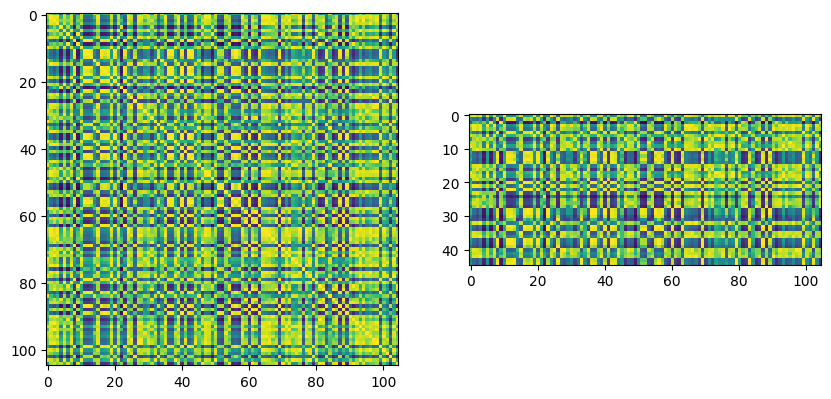

In [14]:
#### agrege una normalizacion hay q probar si funciona con StandardScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#####
Kq_train = Quantum_Kernel( X_train_scaled )
Kq_test  = Quantum_Kernel( X_train_scaled, X_test_scaled )

fig, ax = plt.subplots( 1, 2, figsize=(10,5) )
ax[0].imshow( Kq_train )
ax[1].imshow( Kq_test )

__Desafio:__ Muestre un discriminador que que alcance una calidad superior a $0.95$. Puede volver a los desafios anteriores y modificarlos para intentar mejorar sus resultados.

In [15]:
def test_7c( Kq_train, y_train, Kq_test, y_test ):
    svm = SVC( kernel = 'precomputed' )
    svm.fit( Kq_train, y_train )
    Y_pred_quantum = svm.predict( Kq_test )
    #print( 'Datos de entrenamiento:', y_test )
    #print( 'Predicción:            ', Y_pred_quantum )
    # print( 'Fidelidad train:       ', svm.score( Kq_train, Y_train ) )
    print( 'Fidelidad test:        ', svm.score( Kq_test, y_test ) )
    if svm.score( Kq_test, y_test ) > 0.95:
        print('Tu discrimindor alcanza una calidad superior al 95%.')
    else:
        print('Vuelve a los desafios anteriores para intentar mejorar tu discriminador.')
    ### agregado para que te salga la matriz de confusion con su reporte de clasificacion
    quantum = confusion_matrix(y_test, Y_pred_quantum)

    ConfusionMatrixDisplay(confusion_matrix=quantum).plot();
    print(classification_report(y_test, Y_pred_quantum))
    ###

    # ### agregado para que te salga el grafico pero no puedo hacerlo funcionar

    # X = X_train_scaled
    # y = X_test_scaled

    # # Crear una malla de puntos para la visualización
    # x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
    #                      np.linspace(y_min, y_max, 500))

    # # Transformar la malla en coordenadas para calcular el kernel
    # mesh_points = np.c_[xx.ravel(), yy.ravel()]
    # Kq_mesh = Quantum_Kernel(mesh_points, X_train)

    # # Hacer predicciones en la malla
    # Z = SVC.predict(Kq_mesh)
    # Z = Z.reshape(xx.shape)

    # # Visualizar la frontera de decisión
    # plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor="k")
    # plt.xlabel("Sepal Length (cm)")
    # plt.ylabel("Sepal Width (cm)")
    # plt.title("SVC con Kernel Personalizado Precomputado")
    # plt.show()
    # ###


    ### segun yo tendriamos que verificar el test_size y el ramdom_state para que
    ### tengan siempre el mismo input, y cambiar el de este problemas
    ### para que por lo menos utilicen una cx, aunque de menos accuracy y precision

Fidelidad test:         1.0
Tu discrimindor alcanza una calidad superior al 95%.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



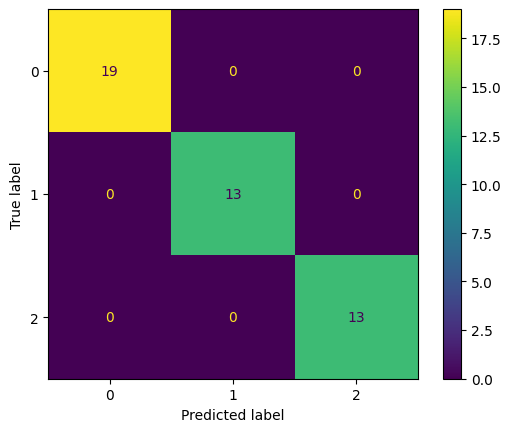

In [16]:
test_7c( Kq_train, y_train, Kq_test, y_test )

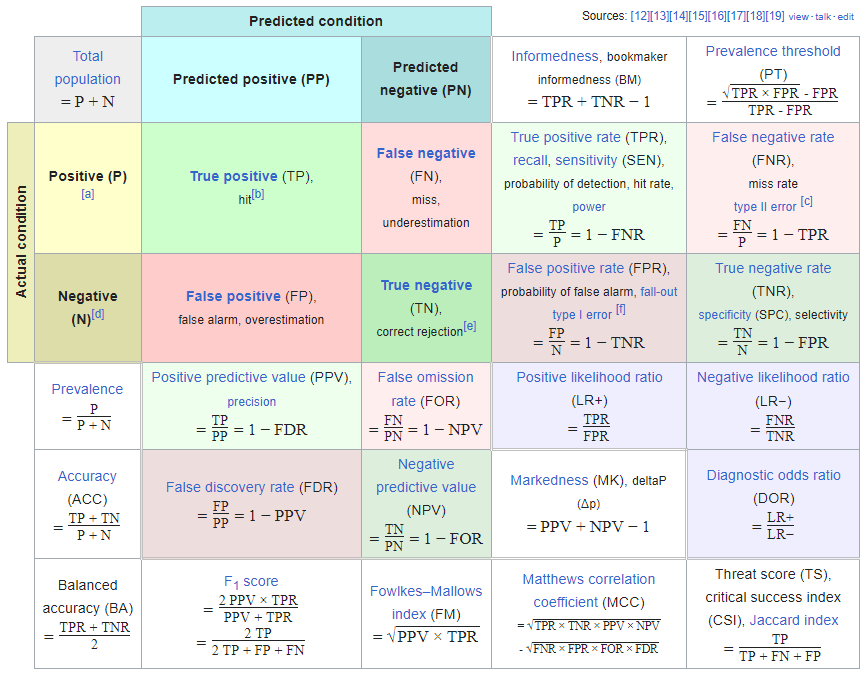

se pueden ocupar cualquiera de esas metricas para comprobar el modelo x si lo quieres para una respuesta xd

https://en.wikipedia.org/wiki/Confusion_matrix

In [17]:
### codigo copiado para un kernel custom lo intente para el kernel cuantico pero no da xd

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

# # Cargar el dataset Iris (usaremos solo dos clases para simplificar)
# iris = load_iris()
# X = iris.data[iris.target != 2, :2]  # Usamos solo las dos primeras características y dos clases
# y = iris.target[iris.target != 2]

# # Dividir en conjunto de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Definir el kernel personalizado
# def custom_kernel(X, Y):
#     gamma = 0.5  # Parámetro del kernel
#     return np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - Y, axis=2)**2)

# # Precomputar el kernel para el conjunto de entrenamiento
# K_train = custom_kernel(X_train, X_train)

# # Entrenar el SVC con kernel precomputado
# svc = SVC(kernel="precomputed")
# svc.fit(K_train, y_train)

# # Precomputar el kernel para el conjunto de prueba
# K_test = custom_kernel(X_test, X_train)
# accuracy = svc.score(K_test, y_test)
# print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

# # Crear una malla de puntos para la visualización
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
#                      np.linspace(y_min, y_max, 500))

# # Transformar la malla en coordenadas para calcular el kernel
# mesh_points = np.c_[xx.ravel(), yy.ravel()]
# K_mesh = custom_kernel(mesh_points, X_train)

# # Hacer predicciones en la malla
# Z = svc.predict(K_mesh)
# Z = Z.reshape(xx.shape)

# # Visualizar la frontera de decisión
# plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor="k")
# plt.xlabel("Sepal Length (cm)")
# plt.ylabel("Sepal Width (cm)")
# plt.title("SVC con Kernel Personalizado Precomputado")
# plt.show()